**Kütüphanelerin İçe Aktarılması**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler


**Veri Setini Yükleme ve İnceleme**

In [3]:
# Verisetini yükleyelim.
sample_data = pd.read_excel("side_effect_data 1.xlsx")

# İlk satırlara göz atmak için:
print(sample_data.head())

# Veri yapısını incelemek için:
print(sample_data.info())

# Eksik veri kontrolü sağalamak için:
print(sample_data.isnull().sum())

   Kullanici_id Cinsiyet Dogum_Tarihi    Uyruk         Il  \
0           107     Male   1960-03-01  Turkiye  Canakkale   
1           140     Male   1939-10-12  Turkiye    Trabzon   
2             2   Female   1976-12-17  Turkiye  Canakkale   
3            83     Male   1977-06-17  Turkiye      Adana   
4             7   Female   1976-09-03  Turkiye      Izmir   

                         Ilac_Adi Ilac_Baslangic_Tarihi Ilac_Bitis_Tarihi  \
0                 trifluoperazine            2022-01-09        2022-03-04   
1                fluphenazine hcl            2022-01-09        2022-03-08   
2                 warfarin sodium            2022-01-11        2022-03-12   
3                   valproic acid            2022-01-04        2022-03-12   
4  carbamazepine extended release            2022-01-13        2022-03-06   

                Yan_Etki Yan_Etki_Bildirim_Tarihi Alerjilerim  \
0               Kabizlik      2022-02-19 18:28:43       Ceviz   
1              Yorgunluk      2022-02-03

Yorum:
Bu veri setinde, özellikle kronik hastalıklar, cinsiyet, kan grubu, boy ve kilo gibi bazı kritik bilgilerin eksik olduğunu görüyorum. Eksik verilerin bu kadar yüksek oranda olduğu durumlarda, eksik değerleri doldurma (imputation), eksik verileri çıkarma veya farklı tekniklerle veri kalitesini artırma gibi adımlar uygulamak gerekir. Özellikle makine öğrenmesi modelleri için eksik değerlerle başa çıkmak önemli olacaktır.


** Veri Görselleştirme (EDA)**

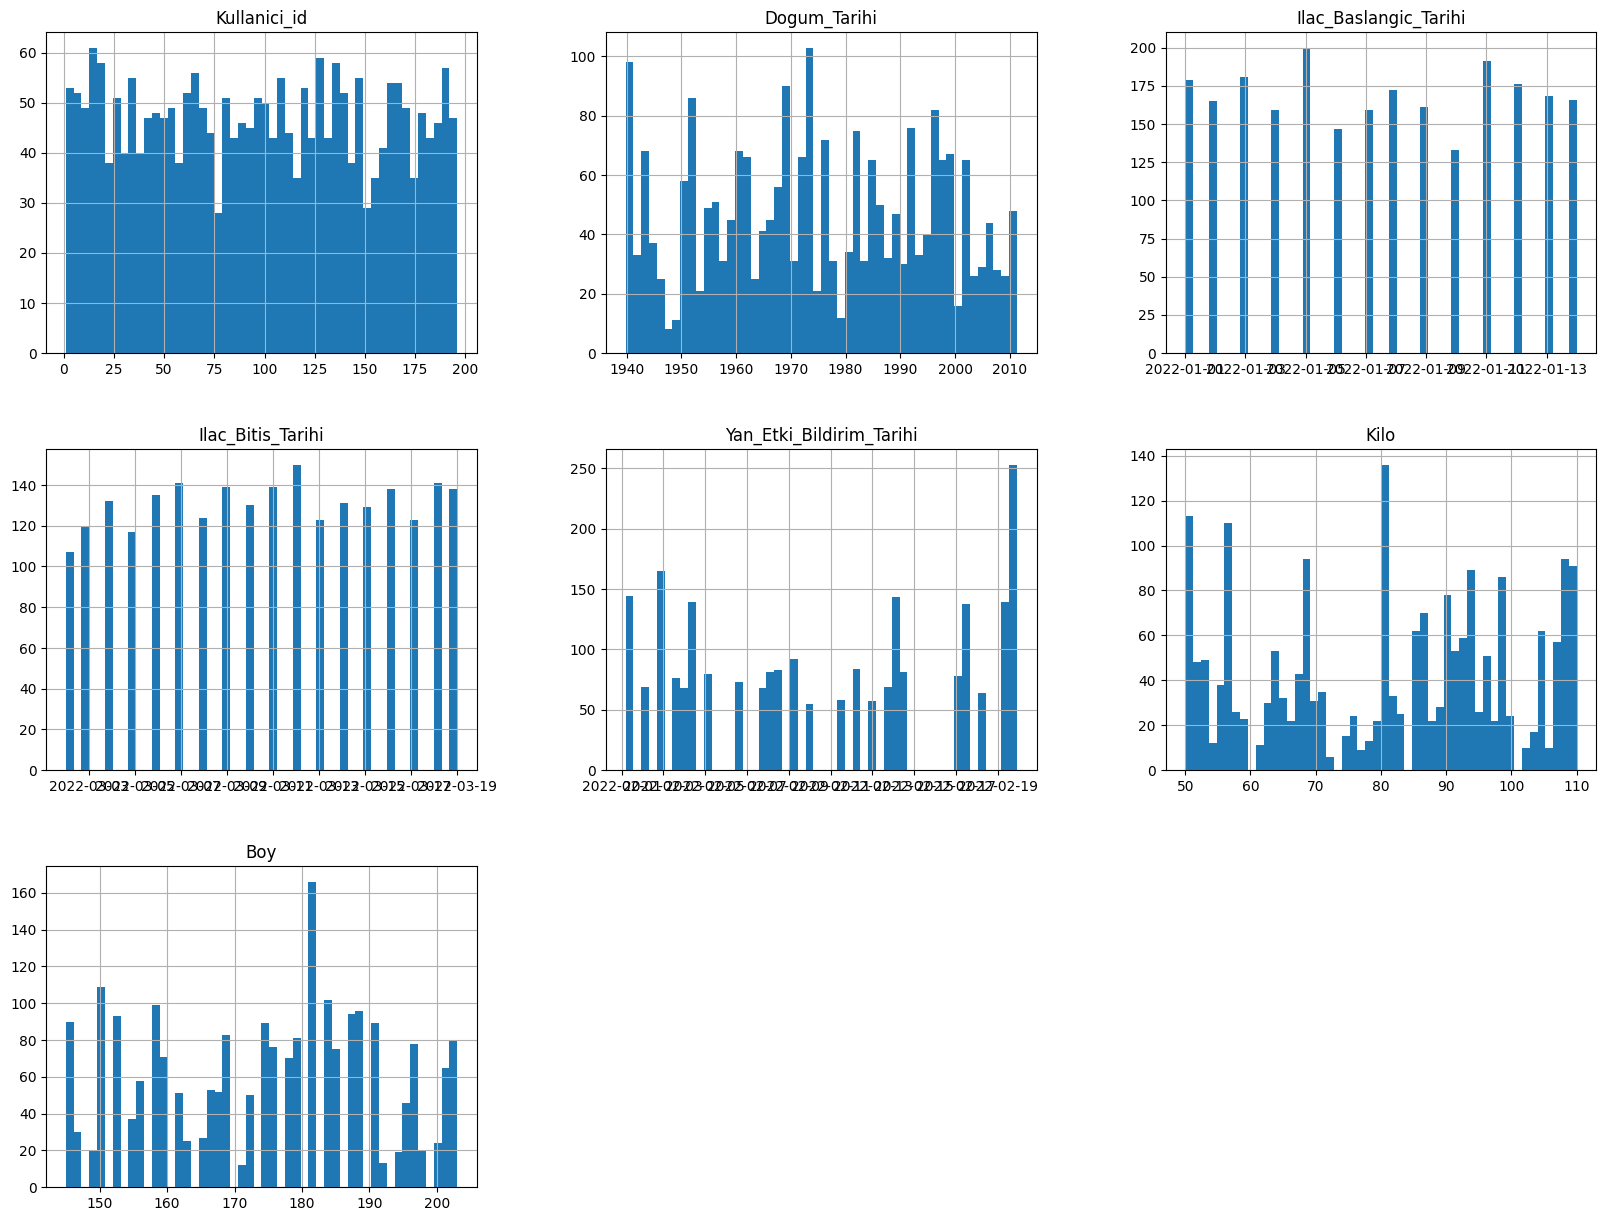

In [5]:
# Sayısal değişkenlerin dağılımını görmek için histogramları kullanalım.
sample_data.hist(bins=50, figsize=(20,15))
plt.show()

Bu kodun amacı, sayısal değişkenlerin dağılımlarını hızlı bir şekilde görselleştirerek, verilerin genel yapısı hakkında bilgi sahibi olmaktır. Histogramlar, veri setinde hangi değerlerin daha sık veya nadir görüldüğünü gösterir. Örneğin, bir değişkende veri noktalarının çoğu belirli bir aralıkta yoğunlaşmışsa, bu histogramda belirgin bir tepe noktası oluşturur.

Yorum:
Genel olarak sayısal değişkenlerde dengeli bir dağılım gözlemledim.Ama genel bir bakış atmak gerekirse :
100 den fazla kişi 1970-1980  tarihleri arasında doğmuş,
En yoğun yan etki bildirim tarihi 02-19 olarak gözüküyor.
80-85 kg kilo ya sahip kişi sayısı fazla ve 180-185 cm arası boya sahip insan yoğunlukta görülüyor.


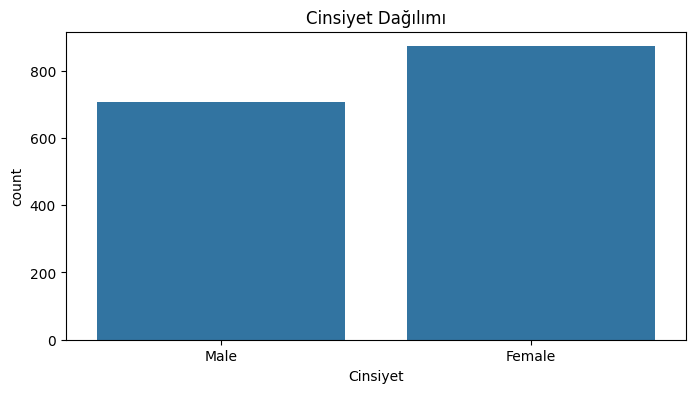

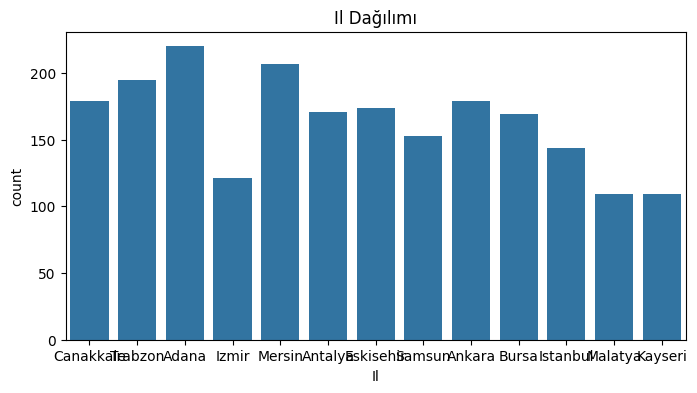

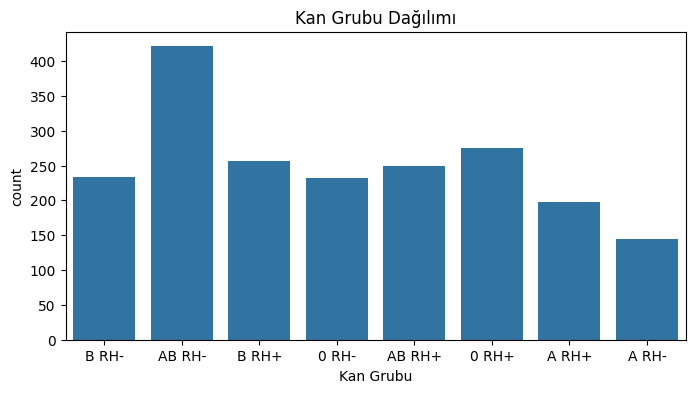

In [6]:
# Kategorik değişkenler için bar grafikleri kullanalım.
categorical_columns = ['Cinsiyet', 'Il', 'Kan Grubu']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=sample_data, x=col)
    plt.title(f'{col} Dağılımı')
    plt.show()


Yorum:
Kadın sayısı erkeğe göre fazla, 200 den fazla kişi Adana yaşıyor ve en yoğun kan grubu AB RH- olarak görülüyor.


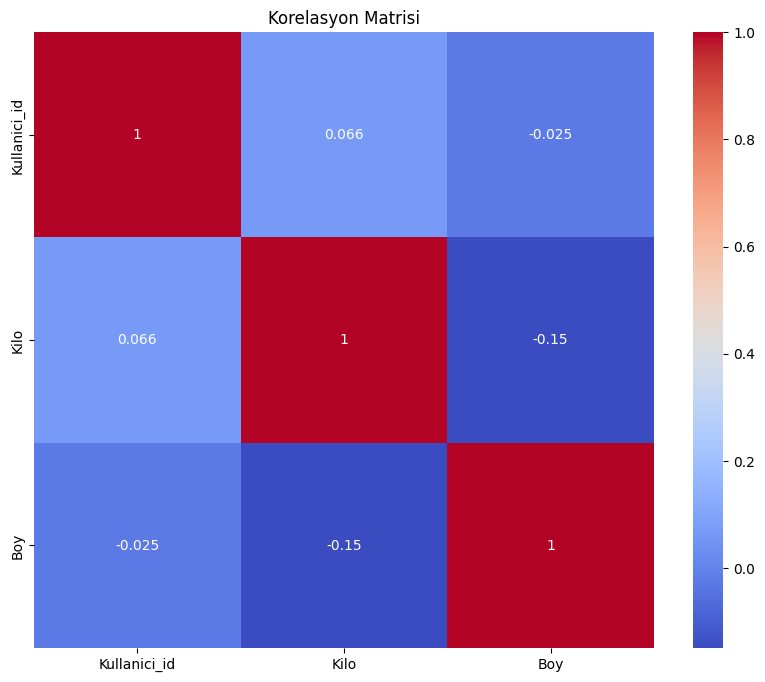

In [8]:
# Isı haritası ile korelasyon analizi yapalım.
# Önce Sayısal sütunları seçelim
numerical_data = sample_data.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisi oluşturma ve ısı haritasını çizme
plt.figure(figsize=(10,8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()


**Eksik Verilerin İşlenmesi**

In [9]:
# Kategorik değişkenlerde eksik verileri en sık görülen değer ile dolduralım
imputer_cat = SimpleImputer(strategy='most_frequent')
sample_data[categorical_columns] = imputer_cat.fit_transform(sample_data[categorical_columns])

# Sayısal değişkenlerde eksik verileri ortalama ile dolduralım
numerical_columns = ['Kilo', 'Boy']
imputer_num = SimpleImputer(strategy='mean')
sample_data[numerical_columns] = imputer_num.fit_transform(sample_data[numerical_columns])


Kategorik Değişkenler için Eksik Verilerin Doldurulması:

SimpleImputer sınıfı, eksik verileri doldurmak için kullanılan bir araçtır. Burada, strategy='most_frequent' parametresi ile kategorik değişkenlerde eksik veriler en sık görülen değer ile doldurulmaktadır.
sample_data[categorical_columns], kategorik değişkenlerin bulunduğu DataFrame'in bir dilimidir. fit_transform metodu, bu dilimdeki eksik verileri doldurmak için en sık görülen değeri hesaplar ve eksik verileri bu değer ile değiştirir.
Sayısal Değişkenler için Eksik Verilerin Doldurulması:

numerical_columns listesi, sayısal değişkenlerin adlarını içermektedir. Burada, 'Kilo' ve 'Boy' değişkenleri yer almaktadır.
SimpleImputer yine kullanılarak, bu sayısal değişkenlerde eksik veriler ortalama (strategy='mean') ile doldurulmaktadır.
sample_data[numerical_columns] kısmı, sayısal değişkenlerin bulunduğu DataFrame'in bir dilimidir ve fit_transform metodu ile eksik veriler ortalama ile doldurulmaktadır.
Bu işlem, veri setindeki eksik verileri temizlemek ve daha sonrasında yapılacak analizler veya modelleme için verilerin hazır olmasını sağlamak amacıyla yapılmaktadır.








**Kategorik Değişkenlerin Kodlanması**

In [13]:
# Cinsiyet değişkenini LabelEncoder ile kodlama yapalım
le = LabelEncoder()
sample_data['Cinsiyet'] = le.fit_transform(sample_data['Cinsiyet'])

# Mevcut sütun adlarını kontrol edelim
print(sample_data.columns)

# Kan Grubu ve diğer çok sınıflı kategorik değişkenler için OneHotEncoder kullanımını gerçekleştirelim
ohe_columns = ['Kan Grubu', 'Ilac_Adi', 'Yan_Etki']
# Hatalı sütunları kontrol edip doğru isimlerle güncelleyelim
if all(col in sample_data.columns for col in ohe_columns):
    ohe = OneHotEncoder(sparse_output=False, drop='first')  # sparse parametresi güncellendi
    ohe_encoded = pd.DataFrame(ohe.fit_transform(sample_data[ohe_columns]), columns=ohe.get_feature_names_out(ohe_columns))

    # Orijinal sütunları düşürüp kodlanmış yeni sütunları ekleyelim
    sample_data = sample_data.drop(columns=ohe_columns).reset_index(drop=True)
    sample_data = pd.concat([sample_data, ohe_encoded], axis=1)
else:
    print("Eksik sütunlar: ", [col for col in ohe_columns if col not in sample_data.columns])


Index(['Kullanici_id', 'Cinsiyet', 'Dogum_Tarihi', 'Uyruk', 'Il',
       'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi',
       'Yan_Etki_Bildirim_Tarihi', 'Alerjilerim', 'Kronik Hastaliklarim',
       ...
       'Yan_Etki_Kabizlik', 'Yan_Etki_Karin Agrisi', 'Yan_Etki_Kas Agrisi',
       'Yan_Etki_Mide Bulantisi', 'Yan_Etki_Sinirlilik',
       'Yan_Etki_Tansiyon Dusuklugu', 'Yan_Etki_Tansiyon Yukselme',
       'Yan_Etki_Terleme', 'Yan_Etki_Uykululuk Hali', 'Yan_Etki_Yorgunluk'],
      dtype='object', length=194)
Eksik sütunlar:  ['Kan Grubu', 'Ilac_Adi', 'Yan_Etki']


Label Encoding: 'Cinsiyet' değişkeni, LabelEncoder kullanılarak sayısal değerlere dönüştürülür.
OneHot Encoding: ohe_columns listesindeki kategorik değişkenler OneHotEncoder ile kodlanır. Eğer bu sütunlar mevcutsa, eksik olup olmadığını kontrol ederek kodlama yapılır.
DataFrame Güncellemesi: Orijinal kategorik sütunlar düşürülür ve yeni kodlanmış sütunlar eklenir.

**Sayısal Verilerin Normalizasyonu/Standardizasyonu**

In [14]:
# Sayısal verileri standardizasyon (z-skoru) işlemini gerçekleştirelim
scaler = StandardScaler()
sample_data[numerical_columns] = scaler.fit_transform(sample_data[numerical_columns])

# Son veri setine göz atalım
print(sample_data.head(10))


   Kullanici_id  Cinsiyet Dogum_Tarihi    Uyruk         Il  \
0           107         1   1960-03-01  Turkiye  Canakkale   
1           140         1   1939-10-12  Turkiye    Trabzon   
2             2         0   1976-12-17  Turkiye  Canakkale   
3            83         1   1977-06-17  Turkiye      Adana   
4             7         0   1976-09-03  Turkiye      Izmir   
5           131         1   1982-01-05  Turkiye      Adana   
6            61         0   1997-01-10  Turkiye     Mersin   
7            95         0   1997-01-15  Turkiye    Antalya   
8             3         0   1973-08-05  Turkiye      Adana   
9            53         0   1941-10-16  Turkiye      Adana   

  Ilac_Baslangic_Tarihi Ilac_Bitis_Tarihi Yan_Etki_Bildirim_Tarihi  \
0            2022-01-09        2022-03-04      2022-02-19 18:28:43   
1            2022-01-09        2022-03-08      2022-02-03 20:48:17   
2            2022-01-11        2022-03-12      2022-02-04 05:29:20   
3            2022-01-04        2022-0

Bu veri seti, kullanıcıların ilaç kullanımı ile ilgili çeşitli analizler yapmak için uygundur.Örnek olarak;Yan etkilerin analizi,Cinsiyet veya diğer demografik özelliklere göre yan etki deneyimlerinin karşılaştırılması,Kullanıcıların sağlık geçmişleri ile yan etkiler arasındaki ilişkiler incelenebilir.